In [1]:
import numpy as np  
import matplotlib.pyplot as plt
import pandas as pd
import skimage as ski

512 512


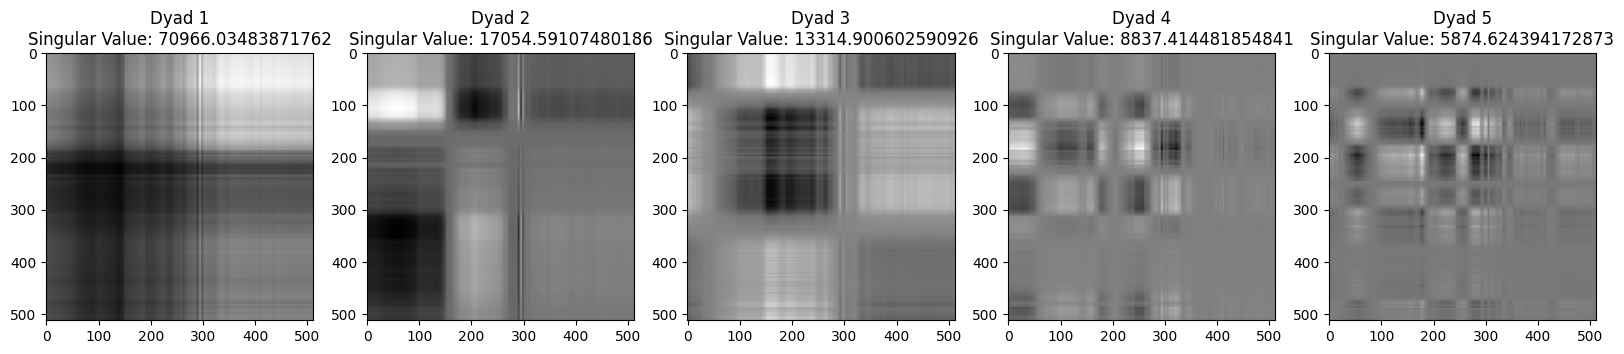

In [2]:
#load the img
X=ski.data.camera()
m,n=X.shape
print(m,n)

#compute the SVD
U,s,Vt=np.linalg.svd(X,full_matrices=False)
S = np.zeros((m, n))
S[:n, :n] = np.diag(s)

#visualize some of the dyads of the SVD
fig, axs = plt.subplots(1, 5, figsize=(20, 5))
for i in range(5):
    axs[i].imshow(np.outer(U[:,i]*s[i], Vt[i,:]), cmap='gray')
    axs[i].set_title(f"Dyad {i+1}"+"\n"+"Singular Value: "+str(s[i]))
plt.show()




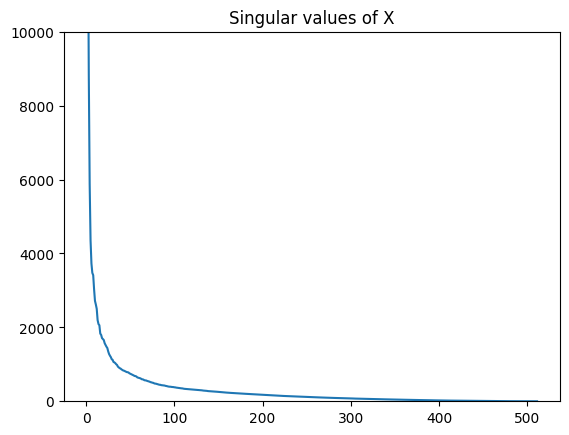

In [4]:
# Plot the singular values of image
plt.plot(s)
plt.title("Singular values of X")
plt.ylim(0, 10000)
plt.show()

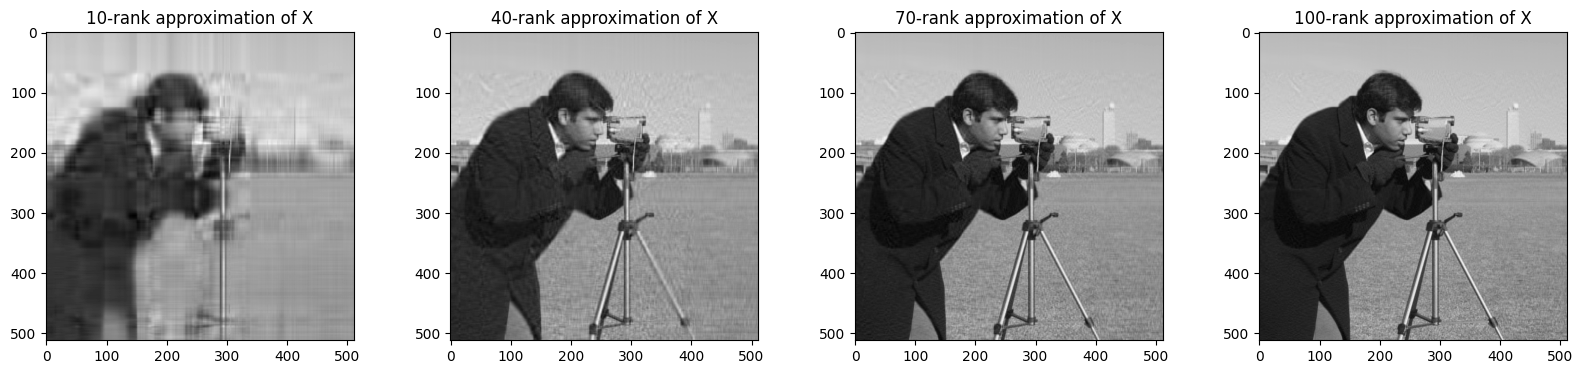

In [5]:
# Visualize the k-rank approximation of X for different values of k
fig, axs = plt.subplots(1, 4, figsize=(20, 4))
for i, k in enumerate(range(10, 101, 30)):
    X_k = U[:,:k] @ S[:k,:k] @ Vt[:k,:]
    axs[i].imshow(X_k, cmap='gray')
    axs[i].set_title(f"{k}-rank approximation of X")
plt.show()


112.290409343606


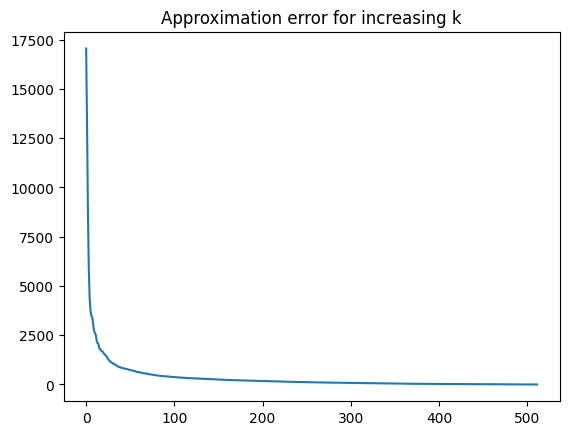

In [6]:
# Compute and plot the approximation error ||X − Xk||F for increasing values of k
errors = [np.linalg.norm(X - U[:,:k] @ S[:k,:k] @ Vt[:k,:],2) for k in range(1, X.shape[1]+1)]
print(errors[255])
plt.plot(errors)
plt.title("Approximation error for increasing k")
plt.show()


512 512


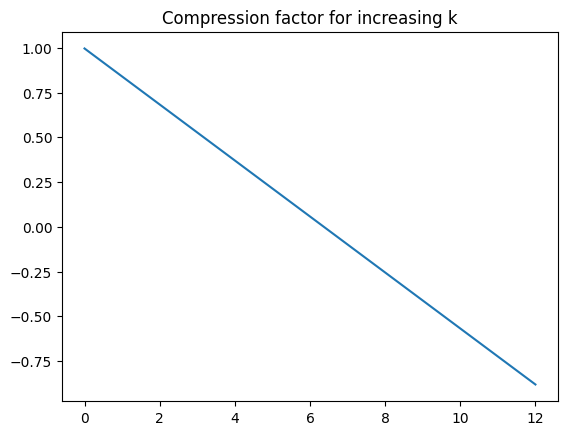

0.8396873474121094


In [17]:
# Plot the compression factor c_k = 1 − k(m+n+1)/mn for increasing k
m, n = X.shape
print(m,n)
compression_factors = [1 - k*(m+n+1)/(m*n) for k in range(1, X.shape[1]+1,40)]
plt.plot(compression_factors)
plt.title("Compression factor for increasing k")
plt.show()
print(compression_factors[1])

In [78]:
# Compute the approximation error when the compressed image requires the same amount of information as the uncompressed image
k = int(m*n / (m + n + 1))
print(k)
error = np.linalg.norm(X - U[:,:k] @ S[:k,:k] @ Vt[:k,:],2)
print(f"Approximation error when c_k = 0: {error}")

255
Approximation error when c_k = 0: 112.8639882219046
